In [1]:
import warnings

warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np
import os
from tqdm.auto import tqdm
import xarray as xr

from scripts.get_stats_per_traj import create_rank_traj_dataset, plot_kde_histogram_interactive
from scripts.get_stats import load_ds
import scripts.latexify as latexify

# Create the dataset
You may use the following cells to create a dataset for plotting yourself.

In [3]:
file_path = "/media/mahieron/Austausch/data/Z2_data_gradients_14Nov/"
model_params = ['dT_mult_min',
    'da_HET',
    'da_prime',
    'da_v',
    'db_prime',
    'db_v',
    'dc_prime',
    'dcloud_max_x',
    'dg_ccn_1',
    'dg_ccn_2',
    'dgraupel_a_geo',
    'dgraupel_b_geo',
    'dgraupel_b_vel',
    'dh_ccn_1',
    'dhande_ccn_fac',
    'di_ccn_1',
    'dice_a_geo',
    'dice_b_geo',
    'dice_b_vel',
    'dk_1_conv',
    'dk_2_conv',
    'dk_r',
    'dkc_autocon',
    'dkin_visc_air',
    'dp_sat_melt',
    'drain_a_geo',
    'drain_b_geo',
    'drain_b_vel',
    'drain_cmu3',
    'drain_mu',
    'drain_nu',
    'dsnow_b_geo',
]
inoutflow_time = 240

In [4]:
ds = create_rank_traj_dataset(
    file_path=file_path,
    inoutflow_time=inoutflow_time,
    model_params=model_params,
)
ds

In [ ]:
comp = dict(zlib=True, complevel=9)
encoding = {var: comp for var in ds.data_vars}
ds.to_netcdf(
    path="/media/mahieron/Austausch/data/Z2_data_stats/rank_per_traj2.nc",
    encoding=encoding,
    compute=True,
    engine="netcdf4",
    format="NETCDF4",
    mode="w",
)

# Plot kde histogram of ranks

In [2]:
ds = xr.open_dataset("/media/mahieron/Austausch/data/Z2_data_stats/rank_per_traj.nc", decode_times=False, engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:              (Output Parameter: 3, file: 45, trajectory: 1113,
                          phase: 5, flow: 4)
Coordinates:
  * Output Parameter     (Output Parameter) object 'QV' ... 'latent_cool'
  * file                 (file) object 'Z2_wcb_trajs_20161005_08.nc' ... 'Z2_...
  * trajectory           (trajectory) int64 0 1 2 3 4 ... 1109 1110 1111 1112
  * phase                (phase) object 'warm phase' 'mixed phase' ... 'any'
  * flow                 (flow) object 'inflow' 'ascent' 'outflow' 'any'
Data variables: (12/86)
    dc_ccn_2 rank        (Output Parameter, file, trajectory, phase, flow) float64 ...
    dp_sat_melt rank     (Output Parameter, file, trajectory, phase, flow) float64 ...
    dsnow_a_geo rank     (Output Parameter, file, trajectory, phase, flow) float64 ...
    da_v rank            (Output Parameter, file, trajectory, phase, flow) float64 ...
    drain_a_vel rank     (Output Parameter, file, trajectory, phase, flow) float64 ...
    dk_r rank            (Output Parameter, file, trajectory, phase, flow) float64 ...
    ...                   ...
    drain_b_geo avg      (Output Parameter, file, trajectory, phase, flow) float64 ...
    dsnow_b_geo avg      (Output Parameter, file, trajectory, phase, flow) float64 ...
    lon                  (file, trajectory) float64 ...
    lat                  (file, trajectory) float64 ...
    avg ascent           (file, trajectory, phase) float64 ...
    asc600 step count    (file, trajectory, phase) float64 ...

Column
    [0] Row
        [0] IntSlider(end=15, name='Width in inches', start=3, value=9)
        [1] IntSlider(end=15, name='Height in inches', start=3, value=6)
        [2] FloatSlider(end=5, name='Scale fontsize', start=0.2, value=0.7)
    [1] Row
        [0] TextInput(value='Path/to/store/plot.png')
        [1] Button(button_type='primary', name='Save Plot')
        [2] Toggle(button_type='success', name='Latexify')
    [2] Row
        [0] Toggle(button_type='success', name='Show flow')
        [1] Toggle(button_type='success', name='Show phase')
        [2] Toggle(button_type='success', name='Ignore zero gradients')
    [3] Row
        [0] CrossSelector(name='Parameter', options=['dc_ccn_2 rank', ...], value=['dc_ccn_2 rank', ...])
        [1] Select(name='Output Parameter', options=['QV', 'latent_heat', ...], value='QV')
    [4] Row
        [0] FloatSlider(end=10, name='Change the line width', start=1, step=0.5, value=2)
        [1] FloatSlider(end=1.5, name='Change the bandwidth f..., start=0.05, step=0.05, value=1.0)
        [2] TextInput(name='Title')
    [5] ParamFunction(function)
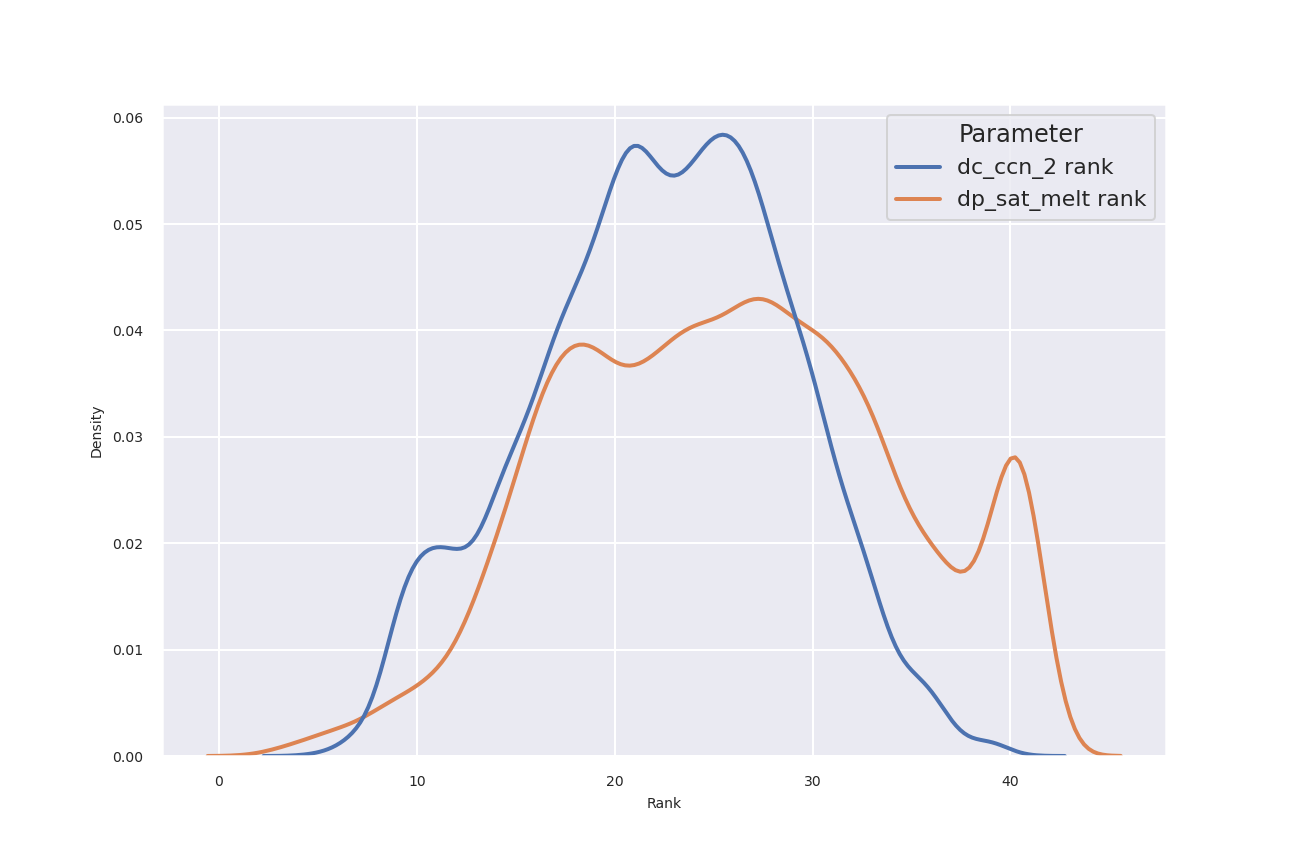

<Figure size 648x432 with 0 Axes>

In [3]:
plot_kde_histogram_interactive(ds)